In [6]:
import sys
sys.path.append("../")

from mxnet import nd, gluon
import d2l

In [7]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(shape=(1, num_hiddens))
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(shape=(1, num_outputs))

params = [W1, b1, W2, b2]
for param in params:
    param.attach_grad()


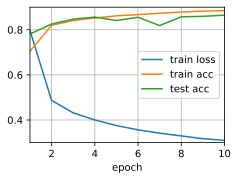

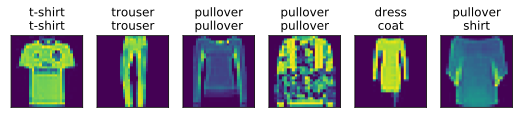

In [8]:
def relu(x):
    return nd.maximum(x, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    Z = relu(nd.dot(X, W1) + b1)
    return nd.dot(Z, W2) + b2

loss = gluon.loss.SoftmaxCrossEntropyLoss()

num_epochs, learning_rate = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size:d2l.sgd(params, learning_rate, batch_size))
d2l.predict_ch3(net, test_iter)